## 0. Libraries

In [46]:
# Load Modules
# ------------------------------------------------------------------------------
# OS and modules
from sinfo import sinfo

# Data wrangling
import pandas as pd

# Data visualization
import seaborn as sns
sns.set_theme()

import matplotlib.pyplot as plt

sinfo()

-----
matplotlib  3.3.4
numpy       1.20.3
pandas      1.2.5
seaborn     0.11.2
sinfo       0.3.1
-----
IPython             7.30.1
jupyter_client      7.1.0
jupyter_core        4.9.1
jupyterlab          3.2.5
notebook            6.4.6
-----
Python 3.9.7 (default, Sep 16 2021, 13:09:58) [GCC 7.5.0]
Linux-5.8.0-59-generic-x86_64-with-glibc2.31
4 logical CPU cores, x86_64
-----
Session information updated at 2021-12-21 20:27


## 1. Data loading

In [8]:
# Load data
data_path = "../input_data/heart.csv"
df = pd.read_csv(data_path)

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [11]:
reg, col = df.shape
print(f"El dataset tiene {col} columnas y {reg} registros.")

El dataset tiene 12 columnas y 918 registros.


## 2. Exploratory data analysis

Tenemos 12 columnas, de las cuales 11 atienden a diferentes tipos de atributos, y la restante es la clase o target a predecir.

In [29]:
columns = list(df.columns)
print(columns)

['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']


La calidad del dataset es aparentemenete buena, al no presentar NaN values.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


En el siguiente cuadro podemos ver la distribución de los valores para cada atributo en caso de ser variables continuas, o el conteo de diferentes valores para las discretas.

In [16]:
df.describe(include="all").round(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.00,918,918,918.00,918.00,918.00,918,918.00,918,918.00,918,918.00
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.51,NaN,NaN,132.40,198.80,0.23,NaN,136.81,NaN,0.89,NaN,0.55
std,9.43,NaN,NaN,18.51,109.38,0.42,NaN,25.46,NaN,1.07,NaN,0.50
min,28.00,NaN,NaN,0.00,0.00,0.00,NaN,60.00,NaN,-2.60,NaN,0.00
25%,47.00,NaN,NaN,120.00,173.25,0.00,NaN,120.00,NaN,0.00,NaN,0.00
50%,54.00,NaN,NaN,130.00,223.00,0.00,NaN,138.00,NaN,0.60,NaN,1.00
75%,60.00,NaN,NaN,140.00,267.00,0.00,NaN,156.00,NaN,1.50,NaN,1.00


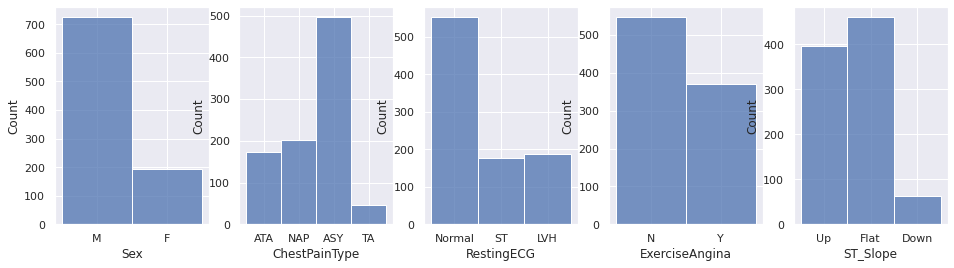

In [61]:
# Variables categóricas
fig, axs = plt.subplots(1, 5, figsize=(16, 4))

sns.histplot(data=df, x="Sex",            ax=axs[0])
sns.histplot(data=df, x="ChestPainType",  ax=axs[1])
sns.histplot(data=df, x="RestingECG",     ax=axs[2])
sns.histplot(data=df, x="ExerciseAngina", ax=axs[3])
sns.histplot(data=df, x="ST_Slope",       ax=axs[4])

plt.show()

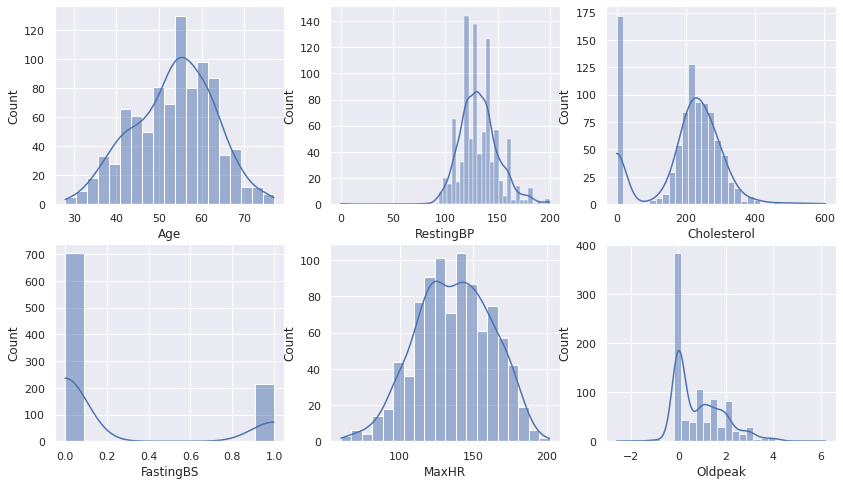

In [54]:
# Variables continuas
fig, axs = plt.subplots(2, 3, figsize=(14, 8))

sns.histplot(data=df, x="Age",         kde=True, ax=axs[0, 0])
sns.histplot(data=df, x="RestingBP",   kde=True, ax=axs[0, 1])
sns.histplot(data=df, x="Cholesterol", kde=True, ax=axs[0, 2])
sns.histplot(data=df, x="FastingBS",   kde=True, ax=axs[1, 0])
sns.histplot(data=df, x="MaxHR",       kde=True, ax=axs[1, 1])
sns.histplot(data=df, x="Oldpeak",     kde=True, ax=axs[1, 2])

plt.show()